In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction import image
from skimage.color import rgb2gray
from skimage.io import imread
from recovers.lista import lista
import torch

# Lista

In [2]:
net = lista()
net = torch.load('Network_1.pth', map_location='cpu')

/datadrive/aziz/.local/lib/python3.7/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.activation.Softshrink' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


Text(0.5, 1.0, 'Original Image')

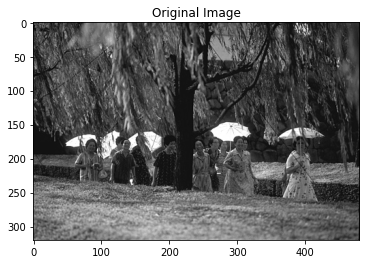

In [77]:
X = imread('./datasets/test/65033.jpg')
X = rgb2gray(X)
X = X[0:320,0:480]
plt.imshow(X, cmap='gray')
plt.title('Original Image')

# Image Donoising

Text(0.5, 1.0, 'Noisy Image')

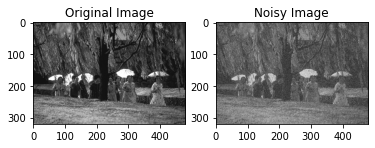

In [78]:
# Creating the noisy image 
noise = np.random.normal(0, 0.1, X.shape)
X_noisy = X + noise

plt.subplot(1,2,1)
plt.imshow(X, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(X_noisy, cmap='gray')
plt.title('Noisy Image')

Text(0.5, 1.0, 'Noisy Image')

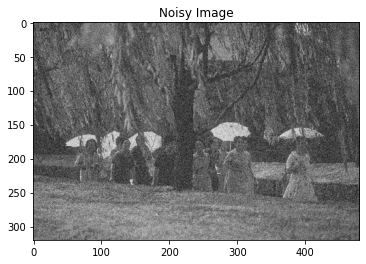

In [79]:
plt.imshow(X_noisy, cmap='gray')
plt.title('Noisy Image')

In [80]:
# Creating patches of the noisy image
X_patched = np.zeros((100, 32*48))
for i in range(32):
    for j in range(48):
        X_patched[:, 48*i + j] = X_noisy[10*i: 10*(i+1), 10*j: 10*(j+1)].reshape((100))

In [81]:
# Prediction Sparse Codes for the noisy image
Z_patched = net(torch.from_numpy(X_patched))
Z = Z_patched.data.numpy()

In [82]:
# Reconstructing the image from the Sparse Code
X_reconstructed = np.zeros(X.shape)
Wd = np.load('Wd.npy')
X_temp = np.matmul(Wd, Z)

for i in range(32):
    for j in range(48):
        X_reconstructed[10*i : 10*(i+1), 10*j : 10*(j+1)] = X_temp[:, 48*i + j].reshape((10,10))

Text(0.5, 1.0, 'Denoised Image')

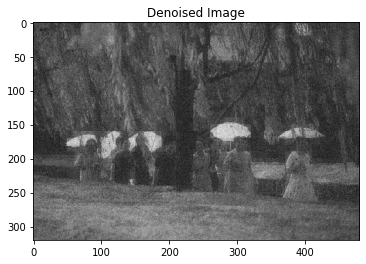

In [86]:
plt.imshow(X_reconstructed, cmap='gray')
plt.title('Denoised Image')

In [84]:
noise_1 = (np.sum((X - np.mean(X))**2) / X.size)**(0.5)
noise_2 = (np.sum((X_noisy - np.mean(X_noisy))**2) / X.size)**(0.5)
noise_3 = (np.sum((X_reconstructed - np.mean(X_reconstructed))**2) / X.size)**(0.5)

print('RMS Noise level for the Original Image:', noise_1)
print('RMS Noise level for the Noisy Image:', noise_2)
print('RMS Noise level for the Denoised Image:', noise_3)

RMS Noise level for the Original Image: 0.18401510648460565
RMS Noise level for the Noisy Image: 0.20949904174286405
RMS Noise level for the Denoised Image: 0.20765577978409808
